In [119]:
### Importing necessary libraries:-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor



In [3]:
#### Reading the Abalone csv file:-
abalone_df = pd.read_csv(r"C:/Users/swati/Downloads/dataset1-master/dataset1-master/abalone.csv")

In [4]:
### Checking size of dataframe:
abalone_df.shape

(4177, 9)

In [5]:
### Since columns Whole Weight,Shucked Weight,Visceat Weight  and Shell  Weight has gap in between them,so renaming it .
abalone_df_new = abalone_df.rename(columns={'Whole weight' :'Whole_weight',
                                            'Shucked weight':'Shucked_weight',
                                            'Viscera weight': 'Viscera_weight',
                                            'Shell weight': 'Shell_weight'
    
                                           })
abalone_df_new

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [8]:
### Checking  for missing and null values in the dataset:-
abalone_df_new.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

There are not any null values present.

In [9]:
## Checking types of columns:
abalone_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


# Only sex column's type is object so we encode it using Label Encoder

In [10]:
from sklearn.preprocessing import LabelEncoder
ler = LabelEncoder()
abalone_df_new['Sex'] =ler.fit_transform(abalone_df_new['Sex'])
abalone_df_new

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


F is encoded as 0,I is encoded as 1 and M is encoded as M.

In [11]:
abalone_df_new.describe()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


As count represents exact number of rows so this also shows that there is not any missing or null values present in dataset 
and we can see Abalone height is 0, which is illogical,so we fill it with mean data.

In [12]:
abalone_df_new['Height']=abalone_df_new['Height'].replace(0,abalone_df_new['Height'].mean())

In [13]:
## Checking for updated min value of Height:-
abalone_df_new.describe()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139583,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041715,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Dataset is looking good. Not any missing or null values are present. 

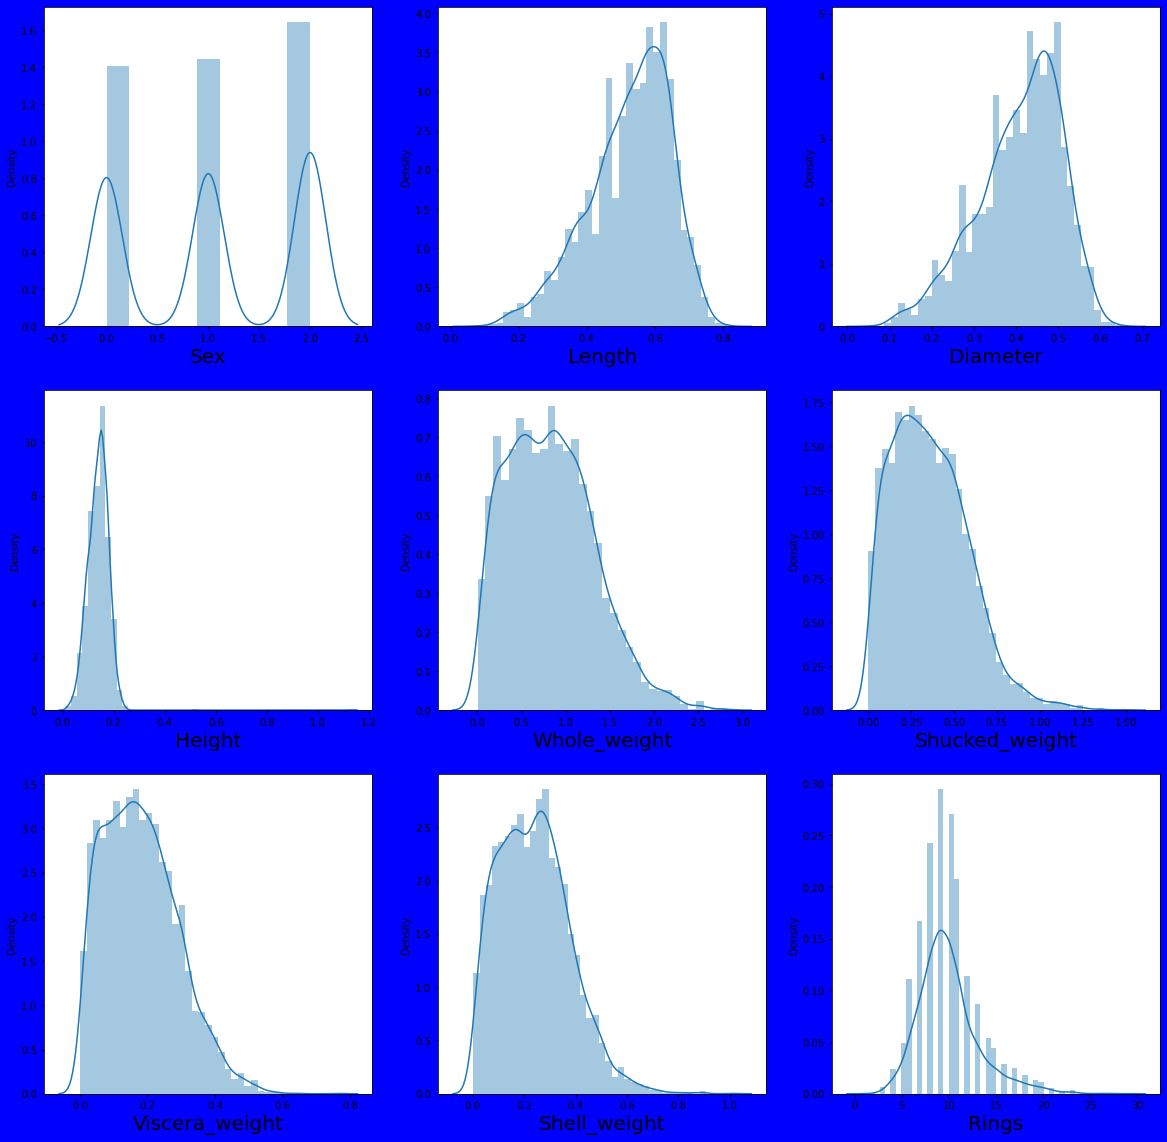

In [14]:
## Now using visualization will try to find distribution of data in the columns:-
plt.figure(figsize=(20,20),facecolor = 'blue')
plotnumber = 1
for column in abalone_df_new:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(abalone_df_new[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()    

As sex column has categorical data,so no need to check for outliers and skewness.From the above graph whole weight,shucked weight,viscera weight,and shell weight are showing little bit skewnwss.So will confirm with other visualization graph.

In [15]:
## Separating label from features:-
abalone_df_features = abalone_df_new.drop('Rings',axis=1)
abalone_df_features

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


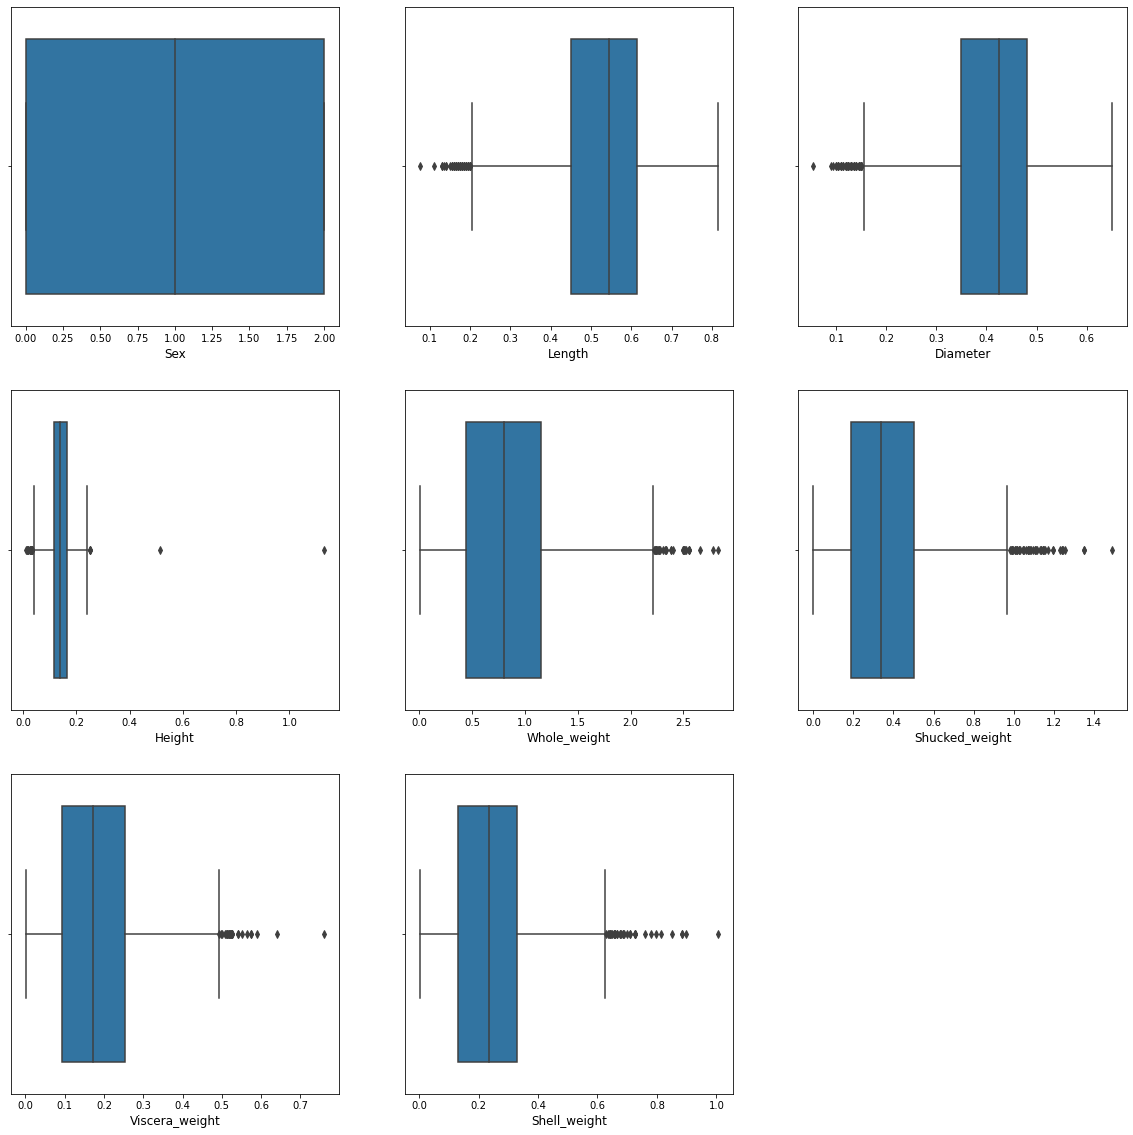

In [16]:
### Visualizing outliers using boxplot:-
plt.figure(figsize=(20,20))
plotnumber=1

for column in abalone_df_features:
    if plotnumber <= 8:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(abalone_df_features[column],orient='v')
        plt.xlabel(column,fontsize=12)
        plotnumber +=1
plt.show()        

As we can clearly see outliers are present in columns like Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight

# Using Inter quantile range to remove Outliers:

In [17]:
## 1st quantile:-
q1 = abalone_df_new.quantile(0.25)
## 3rd quantile:-
q3 = abalone_df_new.quantile(0.75)
## IQR :-
iqr = q3 - q1

Outlier Detection Formula:-
    Higher Side = Q3 + (1.5 * IQR) 
    Lower Side = Q1 - (1.5 * IQR )

In [18]:
### removing outliers from Length column :-
length_lowerside =(q1.Length-(1.5 * iqr.Length))
length_lowerside

0.20250000000000004

In [22]:
### Finding index of that data which are less than .2025:-
index =np.where(abalone_df_new['Length'] <  length_lowerside)
index

(array([], dtype=int64),)

In [20]:
## Dropping that data which are  supposed to be outliers:-
abalone_df_new = abalone_df_new.drop(abalone_df_new.index[index])
abalone_df_new.shape

(4128, 9)

In [21]:
## Removing outliers from Diameter:-
Diameter_lowerside = (q1.Diameter-(1.5 * iqr.Diameter))
Diameter_lowerside

0.15499999999999997

In [23]:
### Finding index of that data which are less than .0.1549:-
index =np.where(abalone_df_new['Diameter'] <  Diameter_lowerside)
index

(array([  43,   44,  510,  873,  879, 1960, 2140, 2508, 2674, 3429, 3477,
        3671], dtype=int64),)

In [24]:
## Dropping that data which are  supposed to be outliers:-
abalone_df_new = abalone_df_new.drop(abalone_df_new.index[index])
abalone_df_new.shape

(4116, 9)

In [25]:
## Removing outliers from Height:
height_lowerside = (q1.Height-(1.5 * iqr.Height))
height_lowerside

0.039999999999999994

In [26]:
### Finding index of that data which are less than 0.03999:-

index =np.where(abalone_df_new['Height'] <  height_lowerside)
index

(array([1146], dtype=int64),)

In [27]:
## Dropping that data which are  supposed to be outliers:-
abalone_df_new = abalone_df_new.drop(abalone_df_new.index[index])
abalone_df_new.shape

(4115, 9)

In [28]:
## Removing outliers from Whole_weight:-
whole_weight_high = (q3.Whole_weight +(1.5 * iqr.Whole_weight))
whole_weight_high

2.22025

In [29]:
### Finding index of that data which are Greater than 2.2202:-

index =np.where(abalone_df_new['Whole_weight'] >  whole_weight_high)
index

(array([ 161,  347,  869, 1027, 1028, 1164, 1177, 1178, 1180, 1396, 1397,
        1398, 1730, 1731, 1732, 2225, 2294, 2577, 2578, 2763, 2814, 2815,
        2959, 2960, 3138, 3374, 3543, 3658, 3742, 3932], dtype=int64),)

In [30]:
## Dropping that data which are  supposed to be outliers:-
abalone_df_new = abalone_df_new.drop(abalone_df_new.index[index])
abalone_df_new.shape

(4085, 9)

In [31]:
## Removing outliers from Shucked_weight:-
shucked_weight_high = (q3.Shucked_weight +(1.5 * iqr.Shucked_weight))
shucked_weight_high

0.976

In [32]:
### Finding index of that data which are Greater than 0.976:-

index =np.where(abalone_df_new['Shucked_weight'] >  shucked_weight_high)
index

(array([1021, 1162, 1164, 1167, 1378, 1379, 1484, 1485, 1706, 1707, 1711,
        1713, 1775, 1935, 2482, 2560, 2610, 2645, 2743, 2900, 2902, 3010,
        3629, 3871, 3872], dtype=int64),)

In [33]:
## Dropping that data which are  supposed to be outliers:-
abalone_df_new = abalone_df_new.drop(abalone_df_new.index[index])
abalone_df_new.shape

(4060, 9)

In [34]:
## Removing outliers from  Viscera weight:-
Viscera_weight_high = (q3.Viscera_weight +(1.5 * iqr.Viscera_weight))
Viscera_weight_high

0.49225

In [35]:
### Finding index of that data which are Greater than 0.49225:-

index =np.where(abalone_df_new['Viscera_weight'] >  Viscera_weight_high)
index

(array([ 165, 1165, 1377, 1702, 1704, 2627, 3522, 4031], dtype=int64),)

In [36]:
## Dropping that data which are  supposed to be outliers:-
abalone_df_new = abalone_df_new.drop(abalone_df_new.index[index])
abalone_df_new.shape

(4052, 9)

In [ ]:
### Removing outliers from Shell_weight:-

In [38]:
shell_weight_high = (q3.Shell_weight +(1.5 * iqr.Shell_weight))
shell_weight_high

0.6275

In [39]:
### Finding index of that data which are Greater than 0.6275:-

index =np.where(abalone_df_new['Shell_weight'] >  shell_weight_high)
index

(array([  79,  127,  153,  159,  160,  161,  162,  163,  267,  321, 1759,
        1919, 2021, 2039, 2086, 2090, 2134, 2199, 2291, 3046, 3047, 3049,
        3808, 4021], dtype=int64),)

In [40]:
## Dropping that data which are  supposed to be outliers:-
abalone_df_new = abalone_df_new.drop(abalone_df_new.index[index])
abalone_df_new.shape

(4028, 9)

In [41]:
abalone_df_new.reset_index()

,index,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4023,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4024,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4025,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4026,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


The data looks much better than before.

<AxesSubplot:>

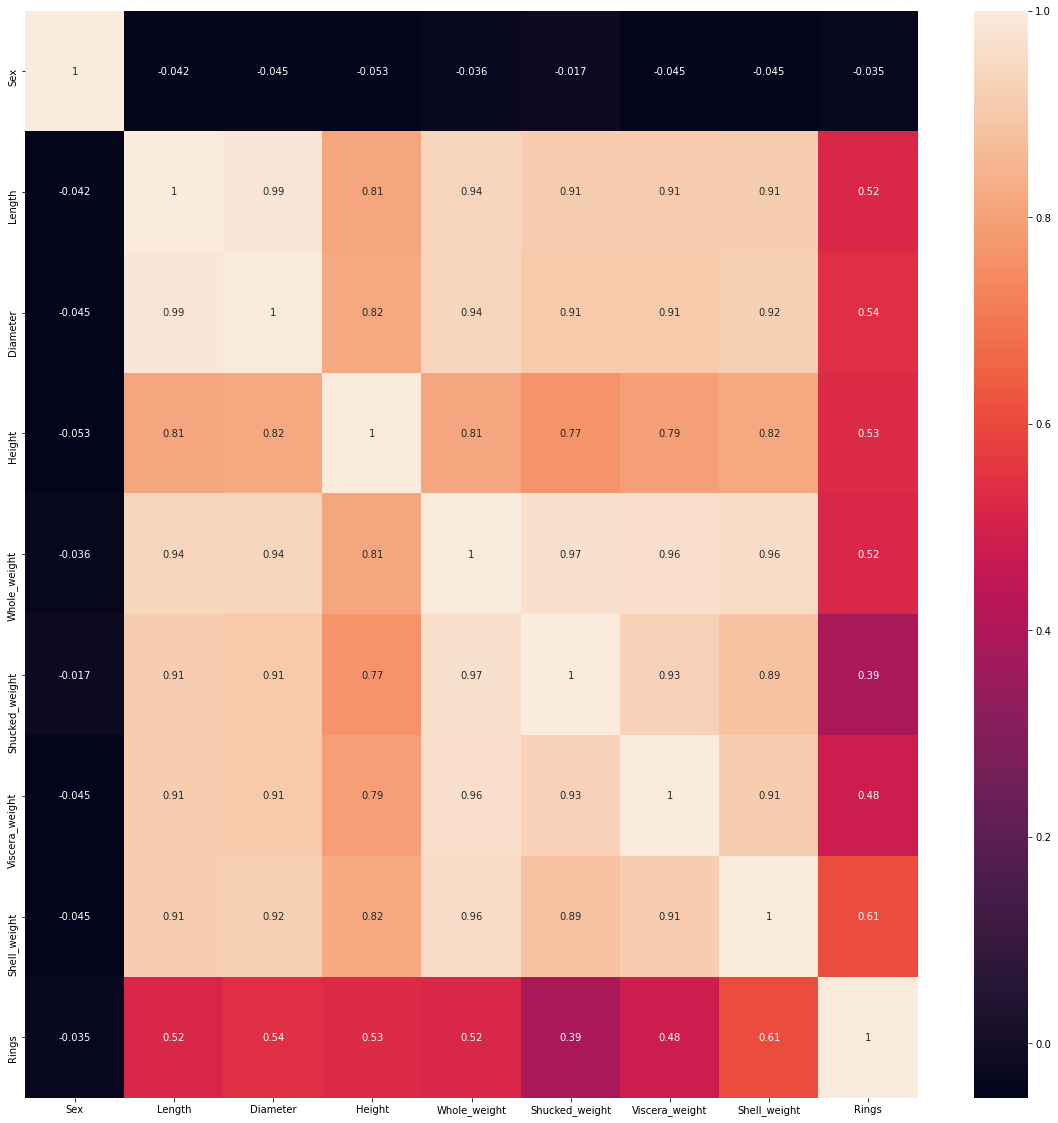

In [42]:
## Checking correlation using Heatmap
plt.figure(figsize=(20,20))
sns.heatmap(abalone_df_new.corr(),annot =True)

Checking the columns which are positively or negatively related with target column:-

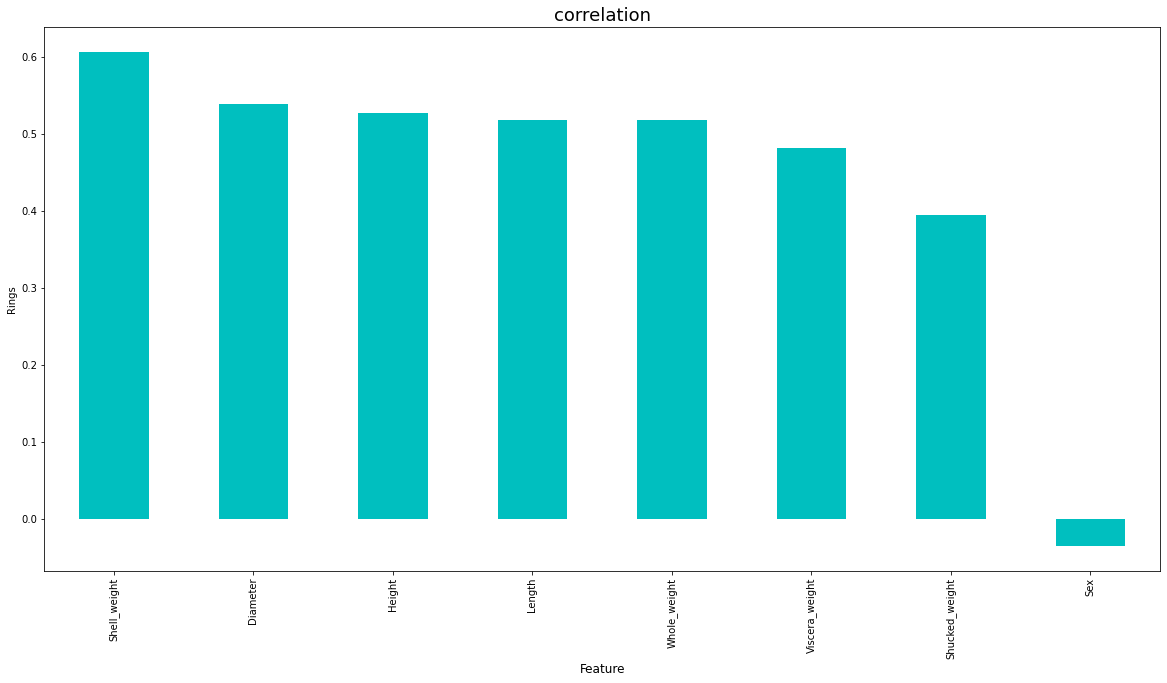

In [45]:
plt.figure(figsize=(20,10))
abalone_df_new.corr()['Rings'].sort_values(ascending=False).drop(['Rings']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize='12')
plt.ylabel('Rings')
plt.title('correlation',fontsize=18)
plt.show()



In [46]:
### checking skewnees:-
abalone_df_new.skew()

Sex              -0.088957
Length           -0.539590
Diameter         -0.519376
Height            3.924135
Whole_weight      0.306025
Shucked_weight    0.427458
Viscera_weight    0.423549
Shell_weight      0.344199
Rings             1.206687
dtype: float64

Keeping +/-0.5 as the range for skewness,We can see only Height column is not in the range,so will treat it using squareroot method.

<AxesSubplot:xlabel='Height', ylabel='Density'>

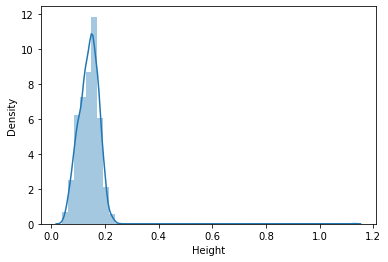

In [47]:
sns.distplot(abalone_df_new['Height'])

In [48]:
### Using square root method for treating positive skewness:-
abalone_df_new['Height'] =np.sqrt(abalone_df_new['Height'])

<AxesSubplot:xlabel='Height', ylabel='Density'>

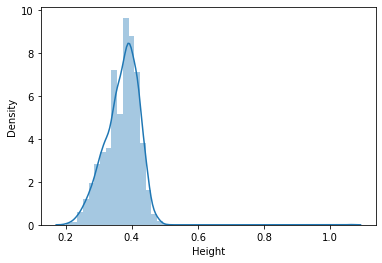

In [49]:
### Visualizing through graph:-
sns.distplot(abalone_df_new['Height'])

In [50]:
abalone_df_new

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,2,0.455,0.365,0.308221,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.300000,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.367423,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.353553,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.282843,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.406202,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.367423,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.452769,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.387298,1.0945,0.5310,0.2610,0.2960,10


In [51]:
abalone_df_new.shape

(4028, 9)

In [53]:
## Percentage loss of data:-
loss_percent =((4177-4028)/4177) * 100
loss_percent

3.567153459420637

# Now Separating the columns into features and label

In [55]:
features = abalone_df_new.drop('Rings',axis =1)
label = abalone_df_new['Rings']

In [56]:
## Scaling the data using Standard Scaler:-
scaler = StandardScaler()
x_scaler = scaler.fit_transform(features)

In [57]:
### Model Building :-
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()

In [59]:

for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(features,label,test_size = 0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print(f"At Random state {i} ,the train data accuracy is :- {r2_score(y_train,pred_train)} ")
    print(f"At Random state {i} ,the test data accuracy is :- {r2_score(y_test,pred_test)} ")
    print("\n")

    

At Random state 0 ,the train data accuracy is :- 0.5018320865441797 
At Random state 0 ,the test data accuracy is :- 0.5332931832549762 


At Random state 1 ,the train data accuracy is :- 0.5064423595210203 
At Random state 1 ,the test data accuracy is :- 0.5234654416724602 


At Random state 2 ,the train data accuracy is :- 0.5183402641217871 
At Random state 2 ,the test data accuracy is :- 0.48068185633046334 


At Random state 3 ,the train data accuracy is :- 0.5096027125349885 
At Random state 3 ,the test data accuracy is :- 0.5057852257627311 


At Random state 4 ,the train data accuracy is :- 0.5032216104965082 
At Random state 4 ,the test data accuracy is :- 0.5345017189341108 


At Random state 5 ,the train data accuracy is :- 0.5107792668922913 
At Random state 5 ,the test data accuracy is :- 0.5123945629618822 


At Random state 6 ,the train data accuracy is :- 0.5148415331252323 
At Random state 6 ,the test data accuracy is :- 0.4966000217476857 


At Random state 7 ,the tra

At Random state 66 ,the test data accuracy is :- 0.509685069922807 


At Random state 67 ,the train data accuracy is :- 0.5165791402956466 
At Random state 67 ,the test data accuracy is :- 0.4889384446139198 


At Random state 68 ,the train data accuracy is :- 0.5190652724256517 
At Random state 68 ,the test data accuracy is :- 0.48451993614257494 


At Random state 69 ,the train data accuracy is :- 0.5157928969487706 
At Random state 69 ,the test data accuracy is :- 0.4912491224521339 


At Random state 70 ,the train data accuracy is :- 0.5113926919218692 
At Random state 70 ,the test data accuracy is :- 0.509002613643155 


At Random state 71 ,the train data accuracy is :- 0.5103777342604418 
At Random state 71 ,the test data accuracy is :- 0.5127896134351271 


At Random state 72 ,the train data accuracy is :- 0.5188284909841651 
At Random state 72 ,the test data accuracy is :- 0.48556379461540655 


At Random state 73 ,the train data accuracy is :- 0.5049152385363851 
At Random sta

In [64]:
 x_train,x_test,y_train,y_test = train_test_split(features,label,test_size = 0.20,random_state=94)


In [65]:
lr.fit(x_train,y_train)

LinearRegression()

In [66]:
pred_test = lr.predict(x_test)

In [67]:
print(r2_score(y_test,pred_test))

0.547989356456898


# Cross Validation of the model:-

In [84]:
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score = cross_val_score(lr,features,label,cv = i)
    cv_mean = cv_score.mean()
    print(f"At cross fold {i} the cv score is {cv_mean}")
    

At cross fold 2 the cv score is 0.500901627768896
At cross fold 3 the cv score is 0.47801657145043847
At cross fold 4 the cv score is 0.37606596070729803
At cross fold 5 the cv score is 0.37015035322130824
At cross fold 6 the cv score is 0.37732300136232116
At cross fold 7 the cv score is 0.4136233520628507
At cross fold 8 the cv score is 0.3359265058457751
At cross fold 9 the cv score is 0.3873392866342839


Above we have checked that our model is overfitting or not.It's not overfitted.

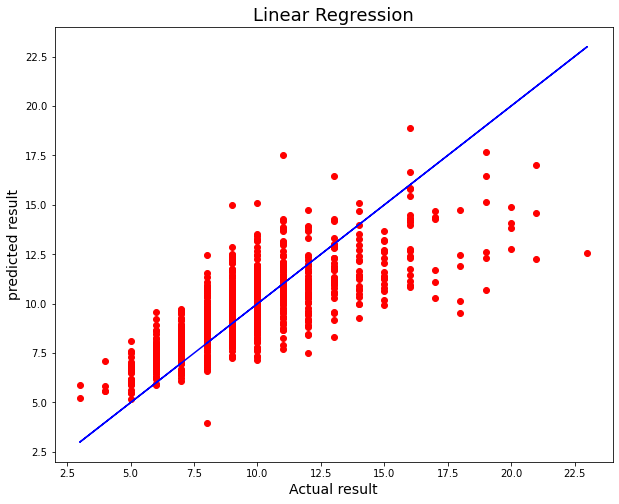

In [87]:
## Visualization through Scatter plot:-
plt.figure(figsize=(10,8))
plt.scatter(x = y_test,y = pred_test,color ='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual result',fontsize=14)
plt.ylabel('predicted result',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()


# Regularization:-

In [91]:
params ={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls = Lasso()
cvs =GridSearchCV(ls,params)
cvs.fit(x_train,y_train)
print(cvs.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [92]:
### providing best parameters:-
ls = Lasso(alpha=.0001,random_state = 0)
ls.fit(x_train,y_train)
predict_ls = ls.predict(x_test)

lss = r2_score(y_test,predict_ls)
lss

0.5481230760705205

In [93]:
## Cross Validation for Lasso
cv_score = cross_val_score(ls,features,label,cv=2)
cv_mean = cv_score.mean()
cv_mean

0.5009960832014635

# Ensemble Technique:-

In [96]:

params ={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf = RandomForestRegressor()
cfr = GridSearchCV(rf,params)
cfr.fit(x_train,y_train)
print(cfr.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt'}


In [99]:
rf =RandomForestRegressor(criterion = 'mse',max_features = 'sqrt')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_rf = rf.predict(x_test)

rfs = r2_score(y_test,pred_rf)
print('R2 score :' , rfs)
## Cross validation:
rfscore = cross_val_score(rf,features,label,cv =2)
cv_mean = rfscore.mean()
print('Cross Val Score :',cv_mean)


R2 score : 0.5640303118508104
Cross Val Score : 0.5105051280679167


# Regularization using Ridge :-

In [103]:
#rc = RidgeCV( alphas = np.arange(.0001,.001,.01,1),normalize = True)
params ={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
rd = Ridge()
cvs =GridSearchCV(rd,params)
cvs.fit(x_train,y_train)
print(cvs.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [104]:
### providing best parameters:-
rd = Ridge(alpha=.1,random_state = 0)
rd.fit(x_train,y_train)
predict_rd = rd.predict(x_test)

score = r2_score(y_test,predict_rd)
score

0.5478729211683078

In [105]:
## Cross Validation for Ridge
cv_score = cross_val_score(rd,features,label,cv=2)
cv_mean = cv_score.mean()
cv_mean

0.502844490248068

So we can see Model is not overfitting.

In [111]:
### Using Decision Tree Regressor for model building:-
param =  {'criterion':['mse','mae'],
          'max_depth':range(2,10),
          'min_samples_leaf':range(2,10),
          'min_samples_split':range(3,10)
    
          }
dtr = DecisionTreeRegressor()
grid_search = GridSearchCV(dtr,param)
grid_search.fit(x_train,y_train)
print(grid_search.best_params_)


{'criterion': 'mse', 'max_depth': 5, 'min_samples_leaf': 9, 'min_samples_split': 3}


In [112]:
## Providing best parameters to Decision Tree:-
dtr = DecisionTreeRegressor(criterion = 'mse',max_depth = 5,min_samples_leaf=9,min_samples_split = 3)
dtr.fit(x_train,y_train)
predict_dtr = dtr.predict(x_test)
score = r2_score(y_test,predict_dtr)
score



0.5017716768380018

In [117]:
## Cross Validation to check overfitting:-
cv_score = cross_val_score(dtr,features,label,cv=2)
cv_mean = cv_score.mean()
cv_mean


0.41224659632929306

In [121]:
### using KNeighborsRegressor Model:-
params ={'n_neighbors' :[3,4,5,7] ,'algorithm':['auto','ball_tree','kd_tree','brute']}
knn = KNeighborsRegressor()
cfr = GridSearchCV(knn,params)
cfr.fit(x_train,y_train)
print(cfr.best_params_)

{'algorithm': 'auto', 'n_neighbors': 7}


In [122]:
## Providing best parameters to KNeighborsRegressor :-
knn = KNeighborsRegressor(n_neighbors=7,algorithm='auto')
knn.fit(x_train,y_train)
predict_knn = knn.predict(x_test)
score = r2_score(y_test,predict_knn)
score



0.5428266877876295

In [123]:
## Cross Validation to check overfitting:-
cv_score = cross_val_score(knn,features,label,cv=2)
cv_mean = cv_score.mean()
cv_mean


0.46744094089779564

# Regularization using Ridge :-

In [ ]:
###Plotting ROC AUC Curve:
disp =plot_roc_curve(dtr,x_test,y_test)   
plot_roc_curve(lr,x_test,y_test,ax = disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax = disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax = disp.ax_)
plt.legend(prop={'size': 11},loc = 'lower right')
plt.show()
